Problem Statement

Company of Electrolysia supplies electricity to the city. It is looking to optimise its electricity production based on the historical electricity consumption of the people of Electrovania. 
 
The company has hired you as a Data Scientist to investigate the past consumption and the weather information to come up with a model that catches the trend as accurately as possible. You have to bear in mind that there are many factors that affect electricity consumption and not all can be measured. Electrolysia has provided you this data on hourly data spanning five years. 
 
For this competition, the training set is comprised of the first 23 days of each month and the test set is the 24th to the end of the month, where the public leaderboard is based on the first two days of test, whereas the private leaderboard considers the rest of the days. Your task is to predict the electricity consumption on hourly basis.

Import libraries

In [101]:
#import libraries
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.1.4
sklearn: 0.22.2.post1
seaborn: 0.11.0


Load and read files

In [102]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Electrolysia/main/train_6BJx641.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Electrolysia/main/test_pavJagI.csv')
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Electrolysia/main/sample_submission_bYgKb77.csv')

In [103]:
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0


In [104]:
test

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A
...,...,...,...,...,...,...,...
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A


In [105]:
sample

,ID,electricity_consumption
0,552,0
1,553,0
2,554,0
3,555,0
4,556,0
...,...,...
8563,35059,0
8564,35060,0
8565,35061,0
8566,35062,0


Check for null values

In [106]:
train.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [107]:
test.isnull().sum()

ID             0
datetime       0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64

Convert datetime to year, month, day and time

In [108]:
train['year'] = train['datetime'].str[:4]
test['year'] = test['datetime'].str[:4]
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013
...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0,2017
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0,2017
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0,2017
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0,2017


In [109]:
train['month'] = train['datetime'].str[5:7]
test['month'] = test['datetime'].str[5:7]
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,07
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,07
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,07
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,07
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,07
...,...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0,2017,06
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0,2017,06
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0,2017,06
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0,2017,06


In [110]:
train['day'] = train['datetime'].str[8:10]
test['day'] = test['datetime'].str[8:10]
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,07,01
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,07,01
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,07,01
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,07,01
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,07,01
...,...,...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0,2017,06,23
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0,2017,06,23
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0,2017,06,23
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0,2017,06,23


In [111]:
train['time'] = train['datetime'].str[11:13]
test['time'] = test['datetime'].str[11:13]
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,time
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,07,01,00
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,07,01,01
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,07,01,02
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,07,01,03
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,07,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0,2017,06,23,19
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0,2017,06,23,20
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0,2017,06,23,21
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0,2017,06,23,22


Ordinal Encode

In [112]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.var2 = enc.fit_transform(train.var2.values.reshape(-1,1))
test.var2 = enc.fit_transform(test.var2.values.reshape(-1,1))
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,time
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0.0,216.0,2013,07,01,00
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0.0,210.0,2013,07,01,01
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0.0,225.0,2013,07,01,02
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0.0,216.0,2013,07,01,03
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0.0,222.0,2013,07,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,0.0,225.0,2017,06,23,19
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,0.0,213.0,2017,06,23,20
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,0.0,213.0,2017,06,23,21
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,0.0,210.0,2017,06,23,22


Convert columns to integars

In [113]:
train.year = train.year.astype(int)
train.month = train.month.astype(int)
train.day = train.day.astype(int)
train.time = train.time.astype(int)

test.year = test.year.astype(int)
test.month = test.month.astype(int)
test.day = test.day.astype(int)
test.time = test.time.astype(int)

Define X and y values

In [114]:
ID = test.ID
y = train.electricity_consumption.values
X = train.drop(['ID', 'datetime', 'electricity_consumption'], axis=1, inplace=False)
X_test = test.drop(['ID', 'datetime'], axis=1, inplace=False)

Split dataset for training and testing

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((23846, 9), (2650, 9), (23846,), (2650,), (8568, 9))

Make pipeline

In [122]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=1000, random_state=1)).fit(X_train,y_train)
print(model.score(X_train, y_train))

0.9643839291561108


Make prediction on validation set

In [123]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.7418067017072085


In [124]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

56.72581861961677


In [125]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,264.0,281.928
1,264.0,233.220
2,270.0,304.962
3,552.0,551.979
4,234.0,229.827
...,...,...
2645,270.0,270.663
2646,207.0,238.638
2647,222.0,278.022
2648,225.0,218.304


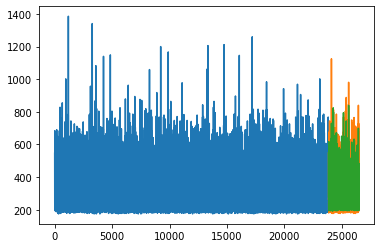

In [126]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Predict on test set

In [127]:
prediction = model.predict(X_test)

In [128]:
sample

,ID,electricity_consumption
0,552,0
1,553,0
2,554,0
3,555,0
4,556,0
...,...,...
8563,35059,0
8564,35060,0
8565,35061,0
8566,35062,0


In [129]:
submission=pd.DataFrame({'ID': ID, 'electricity_consumption': prediction})
submission

,ID,electricity_consumption
0,552,203.697
1,553,206.007
2,554,203.154
3,555,203.373
4,556,367.548
...,...,...
8563,35059,200.373
8564,35060,199.209
8565,35061,200.193
8566,35062,199.386


In [130]:
pd.DataFrame(submission).to_csv('submission.csv', index=False)
print("Your submission has been saved!")

Your submission has been saved!
